In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

In [3]:
SF = pd.read_csv("SeoulFloating.csv")

In [4]:
SF.head(5)

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [5]:
a = SF[(SF['date'] >= '2020-01-01') & (SF['date'] <= '2020-01-31')]
b = SF[(SF['date'] >= '2020-02-01') & (SF['date'] <= '2020-02-29')]
c = SF[(SF['date'] >= '2020-03-01') & (SF['date'] <= '2020-03-31')]
d = SF[(SF['date'] >= '2020-04-01') & (SF['date'] <= '2020-04-30')]

In [6]:
a['calendar'] = 'January'
b['calendar'] = 'February'
c['calendar'] = 'March'
d['calendar'] = 'April'

<ipython-input-6-d2490f468cea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['calendar'] = 'January'
<ipython-input-6-d2490f468cea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['calendar'] = 'February'
<ipython-input-6-d2490f468cea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [7]:
SF = pd.concat([a,b,c,d])
SF

,date,hour,birth_year,sex,province,city,fp_num,calendar
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140,January
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950,January
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450,January
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050,January
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880,January
...,...,...,...,...,...,...,...,...
863995,2020-04-30,22,40,female,Seoul,Seongdong-gu,22150,April
863996,2020-04-30,22,50,female,Seoul,Seodaemun-gu,23270,April
863997,2020-04-30,23,20,female,Seoul,Yongsan-gu,18570,April
863998,2020-04-30,23,30,female,Seoul,Seodaemun-gu,21100,April


## 월별 유동 인구수 그래프

In [8]:
month = pd.DataFrame(index=['sum'])

In [9]:
month['January'] = sum(SF[SF['calendar'] == 'January']['fp_num'])
month['February'] = sum(SF[SF['calendar'] == 'February']['fp_num'])
month['March'] = sum(SF[SF['calendar'] == 'March']['fp_num'])
month['April'] = sum(SF[SF['calendar'] == 'April']['fp_num'])

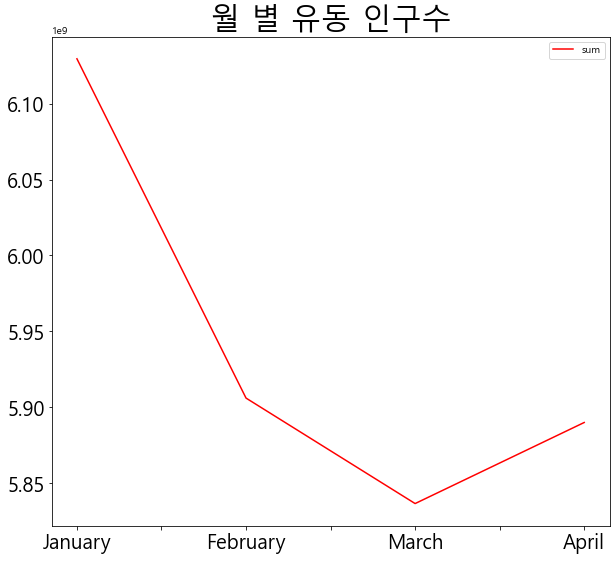

In [61]:
month.T.plot(kind='line', figsize=(10, 9), fontsize=20, color='red')
plt.title('월 별 유동 인구수', size=30)
plt.xticks(rotation=0)
plt.show()

In [62]:
hour = pd.DataFrame(index=['sum'])

In [63]:
hour['0hour~5hour'] = sum(SF[(SF['hour'] >= 0) & (SF['hour'] <= 5)]['fp_num'])
hour['6hour~11hour']  = sum(SF[(SF['hour'] >= 6) & (SF['hour'] <= 11)]['fp_num'])
hour['12hour~17hour'] = sum(SF[(SF['hour'] >= 12) & (SF['hour'] <= 17)]['fp_num'])
hour['18hour~23hour']  = sum(SF[(SF['hour'] >= 18) & (SF['hour'] <= 23)]['fp_num'])

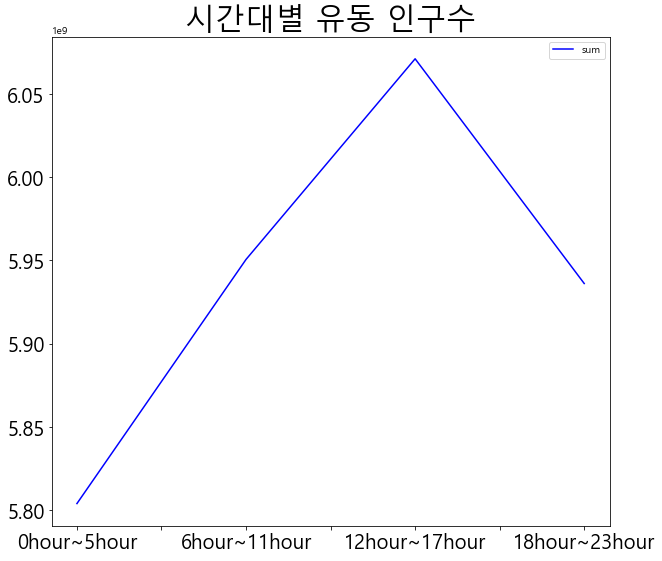

In [64]:
hour.T.plot(kind='line', figsize=(10, 9), fontsize=20, color='blue')
plt.title('시간대 별 유동 인구수', size=30)
plt.xticks(rotation=0)
plt.show()

In [65]:
birth = pd.DataFrame(index=['sum'])

In [66]:
birth['20'] = sum(SF[SF['birth_year'] == 20]['fp_num'])
birth['30'] = sum(SF[SF['birth_year'] == 30]['fp_num'])
birth['40'] = sum(SF[SF['birth_year'] == 40]['fp_num'])
birth['50'] = sum(SF[SF['birth_year'] == 50]['fp_num'])
birth['60'] = sum(SF[SF['birth_year'] == 60]['fp_num'])
birth['70'] = sum(SF[SF['birth_year'] == 70]['fp_num'])

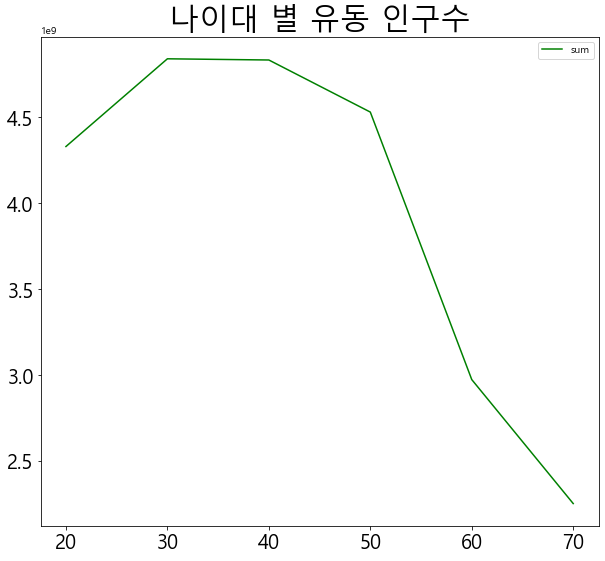

In [67]:
birth.T.plot(kind='line', figsize=(10, 9), fontsize=20, color='green')
plt.title('나이대 별 유동 인구수', size=30)
plt.xticks(rotation=0)
plt.show()

In [ ]:
SF['hour'] = pd.TimedeltaIndex(SF['hour'],unit='H')
SF['datehour'] = pd.to_datetime(SF['date'] )+ SF['hour']
SF[SF['datehour'] == '2020-02-22 23:00'].fp_num
temp = SF[SF['date'] == '2020-02-23'].fp_num/2
SFedit = SF
SFedit.loc[SFedit.date == '2020-02-23','fp_num'] = temp
temp2 = SF[SF['datehour'] == '2020-02-23 11:00:00'].fp_num *2
SFedit.loc[SFedit['datehour'] == '2020-02-23 11:00:00','fp_num'] = temp2

In [ ]:
SF[SF['sex'] == 'male']['fp_num'].sum()


In [ ]:
SF[SF['sex'] == 'female']['fp_num'].sum()